In [1]:
from manifolds import ellipsoid_ground_truth, hyperboloid_ground_truth_a_eql_b
from abby_manifold import Sphere, Torus, Hyperboloid, plot_3d
from abby_curvature import scalar_curvature_est
from manifolds import hyperboloid_ground_truth
from diffusion_curvature import diffusion_curvature
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_noisy(N=5000, r=0.375, R = 1., noise_ratio = 0.1, seed = 42):
    np.random.seed(seed)
    torus_true, thetas = Torus.sample(N, r, R)
    noise = np.random.multivariate_normal([0, 0, 0], np.identity(3), N)
    torus = torus_true + noise * noise_ratio
    return torus_true, thetas, noise, torus
def run_torus(torus, thetas, r=0.375, R=1):
    true_curv_torus = Torus.exact_curvatures(thetas, r, R)
    sce_torus = scalar_curvature_est(2, torus)
    ab_curv_torus = sce_torus.estimate(rmax=np.pi/2)
    return true_curv_torus, ab_curv_torus

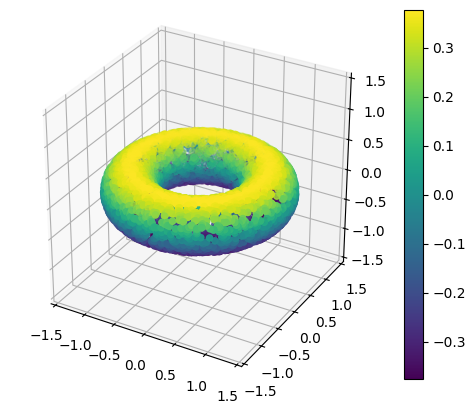

In [3]:
torus_true, thetas, noise, torus = make_noisy(noise_ratio=0.001)
plot_3d(torus)

In [4]:
res = []
for ratio in np.arange(1, 10)* 0.1:
    print(ratio)
    torus_true, thetas, noise, torus = make_noisy(noise_ratio=ratio)
    true_curv_torus, ab_curv_torus = run_torus(torus, thetas)
    dc_curv_torus = diffusion_curvature(torus)
    res.append({"noise": ratio, "ab_corr": np.corrcoef(true_curv_torus, ab_curv_torus)[0, 1], "diffu_corr": np.corrcoef(true_curv_torus, dc_curv_torus)[0, 1]})
    print(res[-1])

0.1
computed Rdist
computed density
computed nearest neighbor matrices
Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.10 seconds.
  Calculating affinities...
  Calculated affinities in 0.25 seconds.
Calculated graph and diffusion operator in 0.40 seconds.
{'noise': 0.1, 'ab_corr': 0.8577283297720752, 'diffu_corr': 0.5044526272969992}
0.2
computed Rdist
computed density
computed nearest neighbor matrices
Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.13 seconds.
  Calculating affinities...
  Calculated affinities in 0.17 seconds.
Calculated graph and diffusion operator in 0.34 seconds.
{'noise': 0.2, 'ab_corr': 0.6212050737509084, 'diffu_corr': 0.3536366635573056}
0.30000000000000004
computed Rdist
computed density
computed nearest neighbor matrices
Running MAGIC on 5000 cells and 3 genes.
Calculatin

In [5]:
import pandas as pd
pd.DataFrame(res).to_csv('res.csv')

In [6]:
pd.DataFrame(res)

,noise,ab_corr,diffu_corr
0,0.1,0.857728,0.504453
1,0.2,0.621205,0.353637
2,0.3,0.466114,0.344100
3,0.4,0.357939,0.267278
4,0.5,0.294227,0.225241
5,0.6,0.246909,0.204455
6,0.7,0.207703,0.186593
7,0.8,0.175619,0.154818
8,0.9,0.149559,0.128657
